# Set up our CMIP6 python environment

This notebook sets up an environment using `conda` for our CMIP6 analysis.

This allows you to install and use specific versions of python packages, which has three advantages:

1. You can use newer version of the packages than those available by default on the JASMIN servers.
2. You can use consistent versions of packages across all your analysis on JASMIN, whether you are using the JASMIN Notebook Service or the JASMIN Scientific Analysis (sci) servers.
3. You can allow others (including your future self) to configure the same version of packages to ensure reproducibility of your work.

## Overview of workflow

You need to run through these steps **once per environment** that you want to create, **and** associate each notebook you're using with the environment **once per notebook**.

* Step 1: Create a new environment with the packages you require (or use our suggested list of packages)
* Step 2: *Freeze* the versions of the packages that you have
* Step 3: Register your environment with Jupyter so that you can use it in Notebooks
* Step 4 (optional): Subsequently install additional packages at a later date

The environment is stored in a file which by convention is usually named `environment.yml`. We provide an example `environment.yml` file will give you the latest versions of several python packages, which you can install and then *freeze*. This will add the exact version numbers you end up installing into the environment file to ensure anyone else running your code gets the same versions.

## Step 0: Naming your environment

We're going to assume that you're going to name the environment `cmip6` and that your environment definition is in `environment.yml`.

If you are working with more than one environment then you'll need to give each a distinct name – you can change these below.

In [2]:
environment_name = "cmip6"
environment_file = "../environment.yml"

## Step 1: Create a new environment with packages from `environment.yml`

First we create a new conda environment, installing all the packages defined in the environment file.

We're going to run commands in the shell using the special jupyter `!` syntax. This is the equivalent of running these commands directly on the command line. If you are working at the command line rather than in JupyterLab, then just type these values directly into the command you are running, replacing the `{environment_name}` etc. placeholders that we've included below with their actual values.

In [2]:
# Create a new conda environment, installing all the packages defined in the environment file
!conda env create --name {environment_name} --file {environment_file}

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



brotlipy-0.7.0       | 341 KB    | ##################################### | 100% 
pyasn1-0.4.8         | 53 KB     | ##################################### | 100% 
jupyterhub-singleuse | 5 KB      | ##################################### | 100% 
docutils-0.15.2      | 737 KB    | ##################################### | 100% 
pyerfa-1.7.3         | 373 KB    | ##################################### | 100% 
hvplot-0.7.1         | 3.0 MB    | ##################################### | 100% 
libuuid-2.32.1       | 28 KB     | ##################################### | 100% 
intake-esm-2021.1.15 | 27 KB     | ##################################### | 100% 
datashader-0.12.1    | 14.3 MB   | ##################################### | 100% 
azure-core-1.12.0    | 64 KB     | ##################################### |

If you've used `pip` virtual environments before, you'll recognise that this is similar to how use use a `requirements.txt` file with pip.

## Step 2: *Freeze* the versions of the packages that you have just installed

By *freezing* the exact versions of all the packages that we have installed to our environment file, we ensure that we have a record of all the software needed to recreate our results. We can reinstall an (almost) identical copy of the environment on another machine, or at a later date.

In [3]:
!conda env export --name {environment_name} --file {environment_file}

If you've used virtual environments with pip before, you'll recognise that this is a bit like `pip freeze` command.

## Step 3: Register your environment with Jupyter

Next we need to:

* Tell Jupyter about the environment
* Tell Jupyter to use the environment to execute the notebook 

We only need to do this once per environment.

If you made changes to the environment file in the previous steps then **make sure you still include the `ipykernel` package**, because Jupyter uses this to execute code within the environment.

In [4]:
# Install the environment as an "ipykernel" so that the Notebook Service will find it
!conda run -n {environment_name} python -m ipykernel install --user --name {environment_name}

# If the above command doesn't work on your system (at time of writing, `conda run` is experimental),
# then you can try:
#   !~/.conda/envs/{environment_name}/bin/python -m ipykernel install --user --name {environment_name}
# or:
#   !~/.miniconda3/envs/{environment_name}/bin/python -m ipykernel install --user --name {environment_name}
# (depending on where your conda environment was created)

Installed kernelspec cmip6 in /home/users/jhaigh0/.local/share/jupyter/kernels/cmip6



Finally, we need to tell Jupyter to use the environment when executing code. We need to do this once for each notebook that will be using the environment.

In Jupyter this is called the 'kernel', and can be changed from *either* the top-right of the screen, *or* the "Kernel" menu:

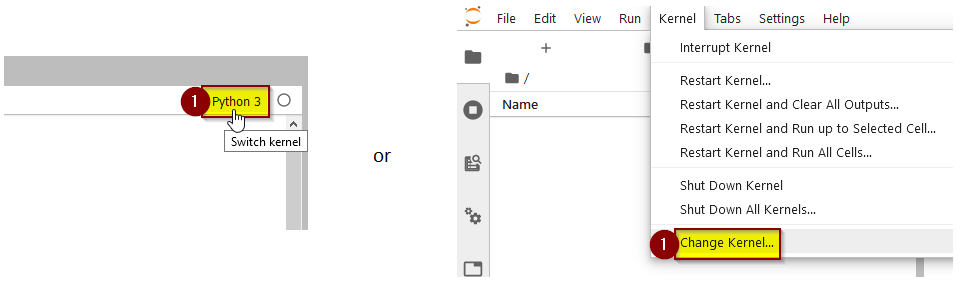

and then choosing the name of your kernel from the dropdown list:

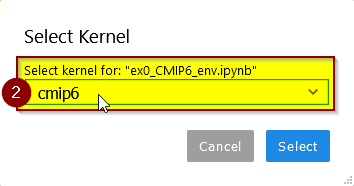

## Step 4 (optional): Subsequently add further packages

There are two main ways to add packages:

1. Install the latest version of a package and then re-*freeze* the versions of packages you have installed to your environment file
2. If you know the exact packages and versions you want already, you can just add then to the environment file directly and then update your environment

We recommend you use `conda` packages where possible, however you can also specify packages that are installed into the environment using `pip` too.

### Method 1: Install and freeze

<span style="color:red">*Since the kernel has changed, `environment_name` is no longer set. I had to re-run the very first cell - JH*</span>

You can install the latest available version of a package using the `conda install` command.

For example, to install the latest version of the `requests` library:

In [3]:
# Install the latest version of a library into our environment
!conda install -y --name {environment_name} requests

# You need to make sure you install the package into the correct environment, so to be on
# the say side we specify that explcitily. As we're working from within a notebook, we
# can't interact with conda as we would from the command line, so we have included `-y`
# to automatically say "yes" to the install going ahead

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



If a package isn't available on the conda repository, then we could try `conda-forge` or use `pip`:

In [ ]:
# To use conda-forge:
#   !conda install -y --name {environment_name} --channel conda-forge requests
#
# or to use pip, one of the following:
#   !conda run --name {environment_name} pip install requests
# or:
#   !~/.conda/envs/{environment_name}/bin/pip install requests
# or:
#   !~/.miniconda3/envs/{environment_name}/bin/pip install requests

The final step in this method is to then *freeze* the exact versions of all the packages that we have installed to our environment file.

In [4]:
!conda env export --name {environment_name} --file {environment_file}

### Method 2: Modify environment file

The other way to add more packages to the environment is to add them to dependencies section of your `environment.yml` file:

    dependencies:
     - python=3.9.1
     - numpy=1.19.2
     - pip
     - pip:
        - altair==4.1.0

Note how you can specify the exact versions of python and the packages that you are using (you don't have to, but it's recommended that you do).

Packages that can be installed via conda can be specified as `<package name>=<package version>`, e.g. `numpy=1.19.2`.

For packages that aren't included in the default conda repository, you can install them via pip, but note that you must include `pip` as a conda dependency and then specify version numbers with a double-equals sign, e.g. `altair==4.1.0`. Instead of pip, you can also try `conda-forge`.

Finally, to actually install the packages, we need to tell conda to update the environment according to the changes we have made:

In [5]:
# Update our conda environment, installing packages added to the environment file
!conda env update --name {environment_name} --file {environment_file}

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda


#
# To activate this environment, use
#
#     $ conda activate cmip6
#
# To deactivate an active environment, use
#
#     $ conda deactivate



If we also want to remove packages from the environment, then the we can recreate the environment afresh:

In [ ]:
# Recreate the conda environment from scratch
#   !conda env create --name {environment_name} --file {environment_file} --force

# NOTE: only run this if you need to – it will remove all packages and reinstall
# as per your environment.yml

For further information, the relevant documentation is:
* [Creating an environment from an environment.yml file](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file)
* [Creating an environment file manually](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#create-env-file-manually)
* [conda-forge: A brief introduction](https://conda-forge.org/docs/user/introduction.html)

## Acknowledgements

This notebook is based on the [conda envs tutorial from CEDA](https://github.com/cedadev/ceda-notebooks/blob/master/notebooks/docs/add_conda_envs.ipynb).

By: [James Thomas](https://github.com/jatonline/) and [William Seviour](https://github.com/wseviour/)

Last updated: 1st April 2021